In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
animes = pd.read_csv('anime.csv')
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
ratings = pd.read_csv('rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [6]:
df_animes = animes.copy(deep=True)

In [7]:
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
df_missing = pd.DataFrame(df_animes.isnull().sum()).T.rename(index={0: 'nb. NA'})
df_missing = pd.concat([df_missing, pd.DataFrame(df_animes.isnull().sum()/df_animes.shape[0]).T.rename(index={0: '% NA'})])
df_missing

,anime_id,name,genre,type,episodes,rating,members
nb. NA,0.0,0.0,62.000000,25.000000,0.0,230.000000,0.0
% NA,0.0,0.0,0.005043,0.002034,0.0,0.018708,0.0


In [9]:
df_animes = df_animes.dropna(subset=['genre', 'type', 'rating'], axis=0)

In [10]:
df_missing = pd.DataFrame(df_animes.isnull().sum()).T.rename(index={0: 'nb. NA'})
df_missing = pd.concat([df_missing, pd.DataFrame(df_animes.isnull().sum()/df_animes.shape[0]).T.rename(index={0: '% NA'})])
df_missing

,anime_id,name,genre,type,episodes,rating,members
nb. NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [12]:
df_animes['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [13]:
df_animes[df_animes['episodes'] == 'Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400


In [14]:
df_animes.loc[df_animes['episodes'] == 'Unknown', 'episodes'] = '-1'

In [15]:
df_animes[df_animes['episodes'] == '-1'].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,-1,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,-1,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,-1,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,-1,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,-1,7.72,5400


In [16]:
df_animes['episodes'] = df_animes['episodes'].astype('int64')

<Axes: xlabel='episodes'>

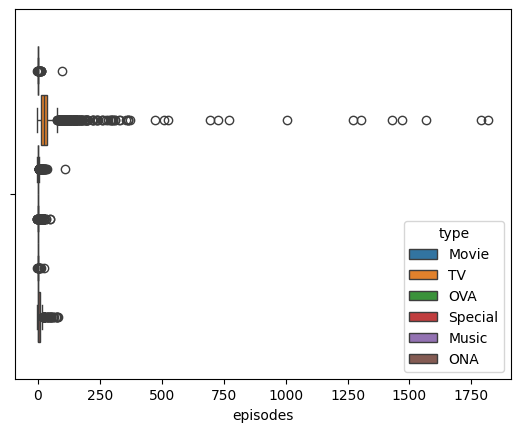

In [17]:
t = df_animes[df_animes['episodes'] != '-1']
sns.boxplot(x=t['episodes'], hue=t['type'])

In [18]:
episode_range = [1, 10, 30, 100, 1000]
episode_categories = ['Short', 'Normal', 'Long', 'Very Long', 'Very Very Long']

def categorize_episodes(ep):
    len_cat = ""
    if ep == -1:
        len_cat = 'Ongoing'
    else:
        for i in range(len(episode_range)-1):
            if (ep >= episode_range[i]) and (ep < episode_range[i+1]):
                len_cat = episode_categories[i]
                break
        if ep >= episode_range[-1]:
            len_cat = episode_categories[-1]

    return len_cat

In [19]:
df_animes['length_category'] = df_animes['episodes'].apply(categorize_episodes)

In [20]:
df_animes.head()

,anime_id,name,genre,type,episodes,rating,members,length_category
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Short
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Long
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Long
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Normal
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Long


In [21]:
df_demo = df_animes.copy(deep=True)

In [22]:
C = df_demo['members'].mean()
print(f"C value in the formula: {C}")

C value in the formula: 18348.87900474328


<Axes: xlabel='members'>

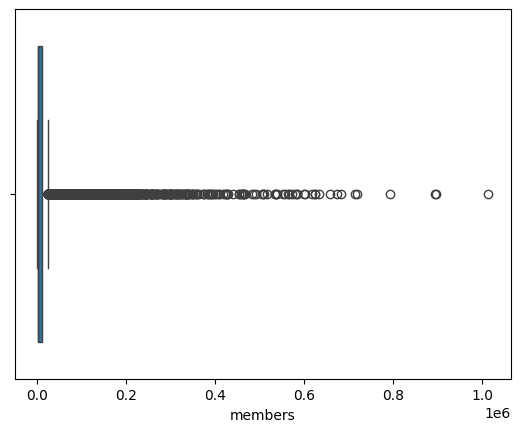

In [23]:
sns.boxplot(x=df_demo['members'], orient='h')

In [24]:
m = df_demo['members'].quantile(0.9)
print(f"Minimum members needed to consider the anime in the listing: {m}")

Minimum members needed to consider the anime in the listing: 46020.399999999994


In [25]:
df_demo = df_demo[df_demo['members'] >= m]

print(f"Qualified animes that can be considered are total: {df_demo.shape[0]}")

Qualified animes that can be considered are total: 1202


In [26]:
def calculate_score(x, m=m, C=C):
    R = x['rating']
    v = x['members']

    return ((v / (v+m)) * R) + ((m / (v+m)) * C)

In [27]:
df_demo['score'] = df_demo.apply(calculate_score, axis=1)

In [28]:
df_demo = df_demo.sort_values('score', ascending=False)

df_demo[['name', 'rating', 'members', 'score']].head()

,name,rating,members,score
2755,Mahou Shoujo Ikusei Keikaku,7.17,46024,9177.665816
3947,Koufuku Graffiti,6.84,46093,9170.631281
1797,Rozen Maiden (2013),7.44,46117,9168.544607
1965,Druaga no Tou: The Sword of Uruk,7.39,46237,9156.603620
949,Dragon Ball Z Special 1: Tatta Hitori no Saish...,7.75,46276,9152.918102


In [29]:
def name_shortener(x):
    return x['name'][:20]+'...' if len(x['name']) > 20 else x['name']

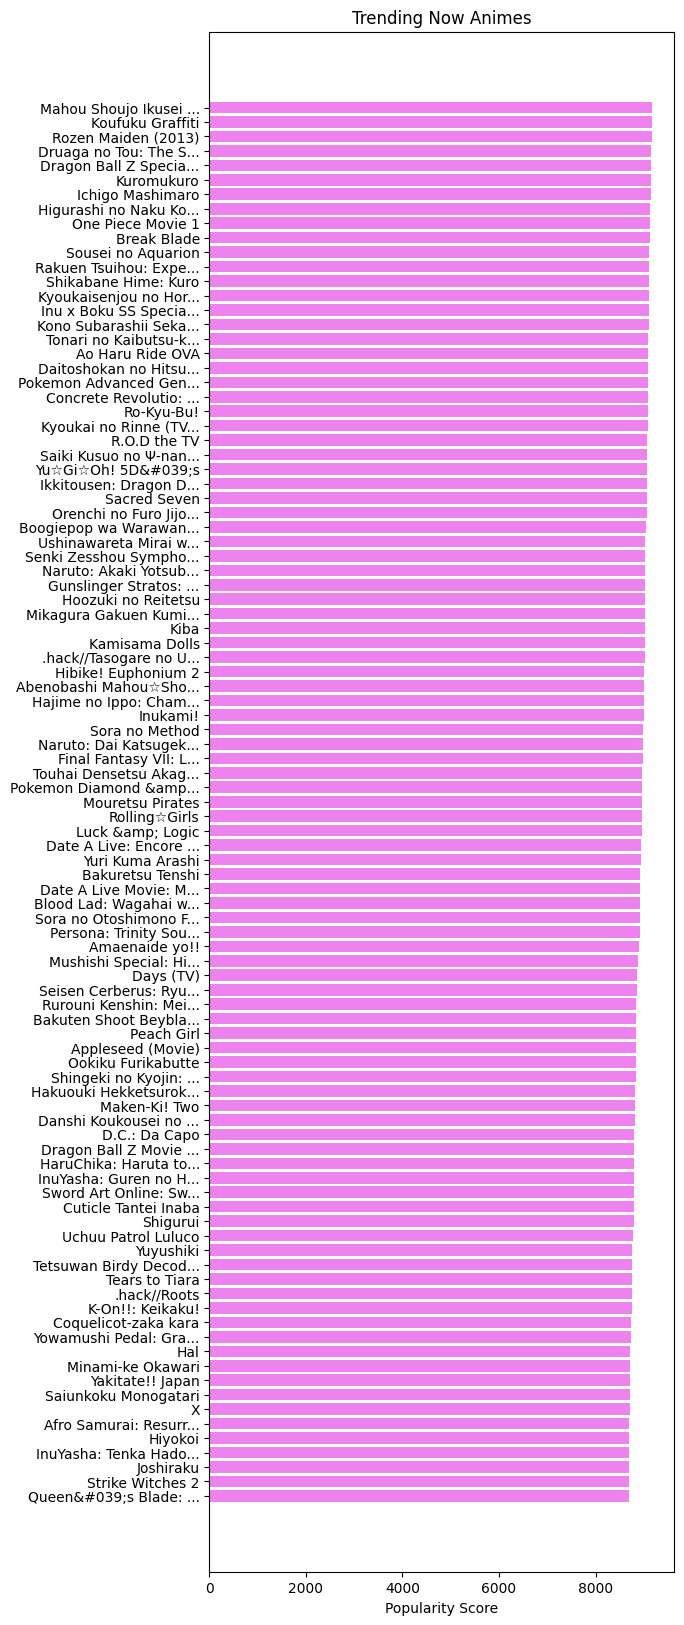

In [30]:
fig = plt.figure(figsize=(6, 20))

plt.barh(df_demo.apply(name_shortener, axis=1).head(100), df_demo['score'].head(100), color='violet', align='center')
plt.gca().invert_yaxis()
plt.xlabel('Popularity Score')
plt.title('Trending Now Animes')
plt.show()

In [31]:
df_content = df_animes.copy(deep=True)

In [32]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         12017 non-null  int64  
 1   name             12017 non-null  object 
 2   genre            12017 non-null  object 
 3   type             12017 non-null  object 
 4   episodes         12017 non-null  int64  
 5   rating           12017 non-null  float64
 6   members          12017 non-null  int64  
 7   length_category  12017 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 844.9+ KB


In [33]:
features = ['genre', 'type', 'length_category']
df_content[features]

,genre,type,length_category
0,"Drama, Romance, School, Supernatural",Movie,Short
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,Long
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,Long
3,"Sci-Fi, Thriller",TV,Normal
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,Long
...,...,...,...
12289,Hentai,OVA,Short
12290,Hentai,OVA,Short
12291,Hentai,OVA,Short
12292,Hentai,OVA,Short


In [34]:
def create_soup(x):
    gs = ' '.join([g.lower() for g in x['genre'].split(", ")])
    ty = x['type'].lower()
    lc = x['length_category'].lower().replace(" ", "")
    return ' '.join([gs, ty, lc])

In [35]:
create_soup(df_content.iloc[0])

'drama romance school supernatural movie short'

In [36]:
df_content['soup'] = df_content.apply(create_soup, axis=1)

In [37]:
df_content.head()

,anime_id,name,genre,type,episodes,rating,members,length_category,soup
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Short,drama romance school supernatural movie short
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Long,action adventure drama fantasy magic military ...
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Long,action comedy historical parody samurai sci-fi...
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Normal,sci-fi thriller tv normal
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Long,action comedy historical parody samurai sci-fi...


In [38]:
count = CountVectorizer(stop_words="english")
count_matrix = count.fit_transform(df_content['soup'])

In [39]:
cos_sim = cosine_similarity(count_matrix, count_matrix)

In [40]:
indices = pd.Series(df_content.index, index=df_content['name']).drop_duplicates()

In [41]:
def get_recommendation(anime_name, cosine_sim=cos_sim):
    idx = indices[anime_name]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    anime_idxs = [i[0] for i in sim_scores]

    return df_content['name'].iloc[anime_idxs]

In [42]:
get_recommendation('One Piece', cos_sim)

1930                                    Dragon Ball Super
231     One Piece: Episode of Merry - Mou Hitori no Na...
241     One Piece: Episode of Nami - Koukaishi no Nami...
896     One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
86                                     Shingeki no Kyojin
2472                                     Digimon Frontier
8498                                    Duel Masters VSRF
206                                         Dragon Ball Z
515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
Name: name, dtype: object

In [43]:
get_recommendation('Dragon Ball', cos_sim)

206                                         Dragon Ball Z
515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
1930                                    Dragon Ball Super
841                                                Naruto
1409                Dragon Ball Z Movie 15: Fukkatsu no F
2534                                   Shadow Skill: Eigi
3203               Dragon Ball Z: Summer Vacation Special
4275                 Dragon Ball Z: Atsumare! Gokuu World
4314    Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...
Name: name, dtype: object

In [44]:
get_recommendation('Kimi no Na wa.', cos_sim)

1111                Aura: Maryuuin Kouga Saigo no Tatakai
208                         Kokoro ga Sakebitagatterunda.
1494                                             Harmonie
1959                                            Air Movie
60                                     Hotarubi no Mori e
1199                     &quot;Bungaku Shoujo&quot; Movie
2103                                        Clannad Movie
5805                          Wind: A Breath of Heart OVA
894                                      Momo e no Tegami
1697    Zutto Mae kara Suki deshita.: Kokuhaku Jikkou ...
Name: name, dtype: object